In [1]:
from accelerator import Lattice
from accelerator.elements import Dipole
from accelerator.elements import Drift
from accelerator.elements import Quadrupole
from accelerator import Beam
from accelerator.utils import to_twiss, to_phase_coord
# from itertools import chain

import matplotlib.pyplot as plt

import numpy as np

# FODO cell

In [2]:
drift_l = 1  # m
focal_length = 10  # meters

FODO_cell = [Quadrupole(focal_length), Drift(drift_l), Quadrupole(-focal_length), Drift(drift_l)]
fodo = Lattice(FODO_cell)
fodo

[Quadrupole(f=10), Drift(length=1), Quadrupole(f=-10), Drift(length=1)]

Oneturn transfer matrix

In [3]:
fodo.m_h

TransferMatrix([[ 0.89,  2.1 ],
                [-0.01,  1.1 ]])

Symplectic check.

$det(M_{one\_turn}) ==1$

In [4]:
np.linalg.det(fodo.m_h)

1.0

In [5]:
fodo.m_h

TransferMatrix([[ 0.89,  2.1 ],
                [-0.01,  1.1 ]])

In [6]:
invariant = fodo.m_h.twiss.invariant
invariant

array([[21.02629932],
       [-1.05131497],
       [ 0.10012523]])

In [7]:
fodo.m_h.twiss @ invariant

TwissTransferMatrix([[21.02629932],
                     [-1.05131497],
                     [ 0.10012523]])

In [8]:
u = to_phase_coord([1, np.pi/8])
u

array([[1.        ],
       [0.39269908]])

In [9]:
u = fodo.m_h @ u
u

TransferMatrix([[1.71466807],
                [0.42196899]])

### initial phase space shape

[[21.02629932]
 [-1.05131497]
 [ 0.10012523]]


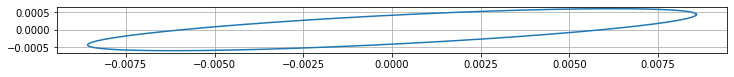

In [10]:
beam = Beam()
twiss_init = invariant
print(twiss_init)
plt.figure(figsize=(12,12))
plt.plot(*beam.phasespace(twiss_init))
plt.gca().set_aspect('equal')
plt.grid()

### twiss parameters along the FODO

In [11]:
beta, alpha, gamma, s = fodo.transport(twiss_init)

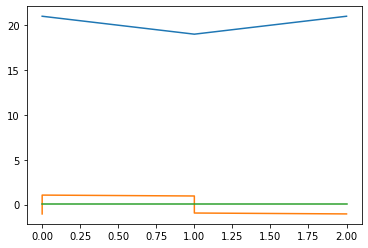

In [12]:
plt.plot(s, beta)
plt.plot(s, alpha)
plt.plot(s, gamma)

In [13]:
u, u_prime, s = fodo.transport([1,1])

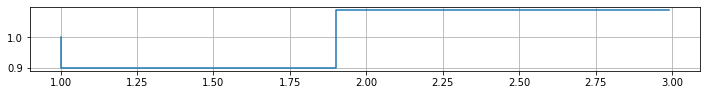

In [14]:
plt.figure(figsize=(12,12))
plt.plot(u, u_prime)
plt.gca().set_aspect('equal')
plt.grid()

# basic ring

In [15]:
n_fodo = 8
n_dipole = n_fodo # one dipole after each fodo
curve_perimeter = 12  # m
dip_theta = 2 * np.pi / n_dipole
dip_rho = curve_perimeter / (n_dipole * dip_theta)

In [16]:
dip = Dipole(dip_rho, dip_theta)

In [17]:
sequence = (FODO_cell + [dip, Drift(drift_l)]) * n_fodo
lattice = Lattice(sequence)
lattice

[Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7854),
 Drift(length=1),
 Quadrupole(f=10),
 Drift(length=1),
 Quadrupole(f=-10),
 Drift(length=1),
 Dipole(rho=1.9099, theta=0.7

### Overview

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

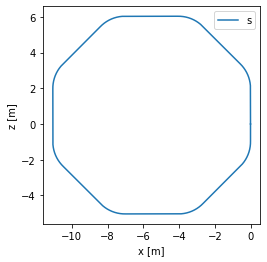

In [18]:
lattice.plot()

### Phasespace coords

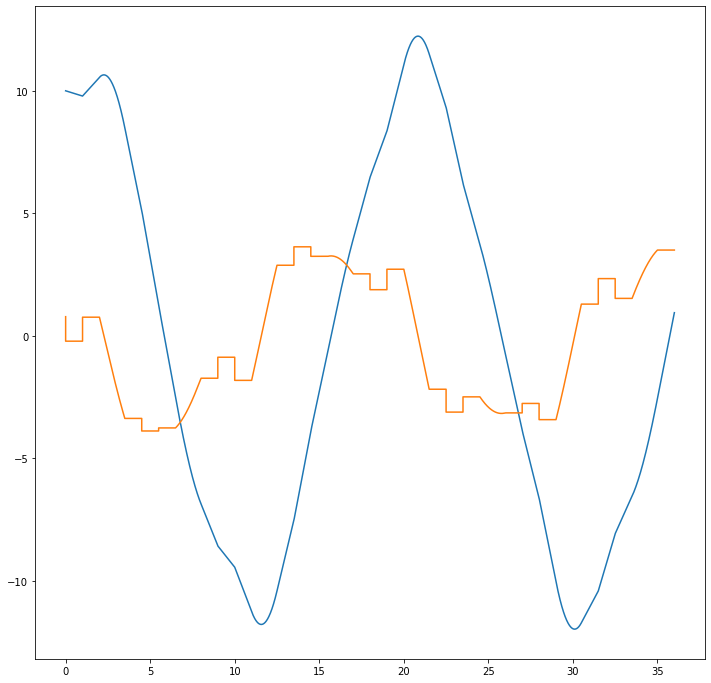

In [19]:
u, u_prime, s = lattice.slice(Drift, 100).slice(Dipole, 100).transport([10, np.pi/4])
plt.figure(figsize=(12, 12))
plt.plot(s, u)
plt.plot(s, u_prime)

### Twiss parameters

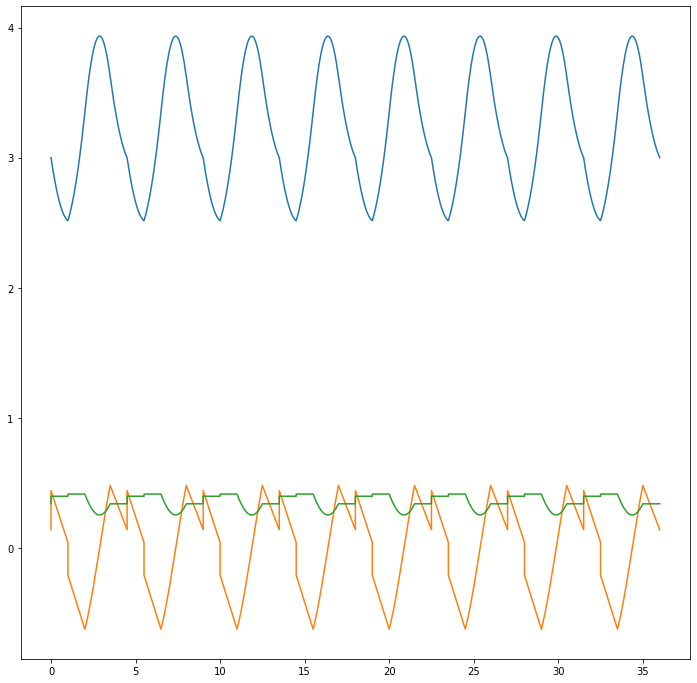

In [20]:
beta, alpha, gamma, s = lattice.slice(Dipole, 100).slice(Drift, 100).transport(lattice.m_h.twiss.invariant)
plt.figure(figsize=(12,12))
plt.plot(s, beta)
plt.plot(s, alpha)
plt.plot(s, gamma)

### Phasespace ellipses

In [21]:
u, u_prime, s = lattice.transport(Beam().phasespace(lattice.m_h.twiss.invariant), plane='h')

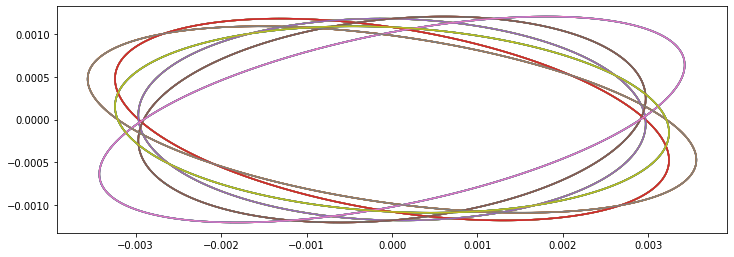

In [22]:
plt.figure(figsize=(12,12))
plt.plot(u, u_prime)
plt.gca().set_aspect('equal')

# Figure 8

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

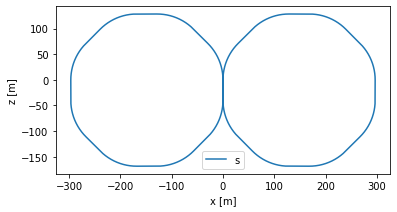

In [23]:
focal_length = 100
drift_l = 20
FODO_cell = [Quadrupole(focal_length), Drift(drift_l), Quadrupole(-focal_length), Drift(drift_l)]

wing_1 = ([Dipole(100, np.pi/4)] + FODO_cell) * 8
wing_2 = ([Dipole(-100, -np.pi/4)] + FODO_cell) * 8

lattice = Lattice(wing_1 + wing_2)
lattice.plot()

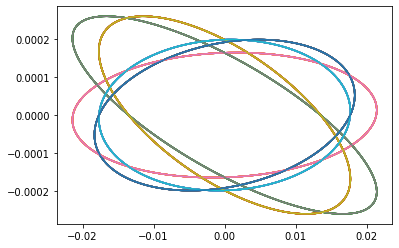

In [24]:
u, u_prime, s = lattice.transport(Beam().phasespace(lattice.m_h.twiss.invariant))
plt.plot(u, u_prime);

In [25]:
beta, alpha, gamma, s = lattice.transport(lattice.m_h.twiss.invariant)

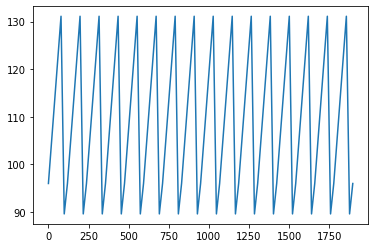

In [26]:
plt.plot(s, beta)